In [ ]:
#Objective: To gain insights into spending patterns and relationships. 
#import libraries

In [ ]:
#Dataset

In [117]:
!pip3 install pandas

In [118]:
!pip3 install seaborn

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

!pip3 install scikit-learn

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [120]:
#import data set
df = pd.read_csv("Desktop/Databases/creditcard.csv")

In [121]:
#preview data - first 10
df.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi,",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",08-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",01-Sep-14,Platinum,Bills,F,67932


In [ ]:
#Data Cleaning

In [122]:
#Show how much of total data per column is missing and highlight which row
for col in df.columns:
        missing_rows = df[df[col].isnull()].index.tolist()
        num_missing = len(missing_rows)
        total_rows = len(df)
        print(f'{col} - Missing: {num_missing}/{total_rows} - Rows: {missing_rows}')

index - Missing: 0/26052 - Rows: []
City - Missing: 0/26052 - Rows: []
Date - Missing: 0/26052 - Rows: []
Card Type - Missing: 0/26052 - Rows: []
Exp Type - Missing: 1/26052 - Rows: [26]
Gender - Missing: 0/26052 - Rows: []
Amount - Missing: 0/26052 - Rows: []


In [123]:
#Show missing row
row_26 = df.iloc[26]
print(row_26)

index                      26
City         Bengaluru, India
Date                23-Mar-14
Card Type            Platinum
Exp Type                  NaN
Gender                      F
Amount                 434427
Name: 26, dtype: object


In [133]:
#Update missing cell
df.loc[26,4]='Bills'


In [136]:
df.loc[26,'Gender']='F'

In [139]:
df.head(30)

,index,City,Date,Card Type,Exp Type,Gender,Amount,4,5
0,0,"Delhi,",29-Oct-14,Gold,Bills,F,82475,NaN,NaN
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,NaN,NaN
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,NaN,NaN
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424,NaN,NaN
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574,NaN,NaN
5,5,"Delhi, India",08-Sep-14,Silver,Bills,F,100036,NaN,NaN
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250,NaN,NaN
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980,NaN,NaN
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247,NaN,NaN
9,9,"Delhi, India",01-Sep-14,Platinum,Bills,F,67932,NaN,NaN


In [145]:
df.head(30)

,index,City,Date,Card Type,Exp Type,Gender,Amount,4,5
0,0,"Delhi,",29-Oct-14,Gold,Bills,F,82475,NaN,NaN
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,NaN,NaN
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,NaN,NaN
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424,NaN,NaN
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574,NaN,NaN
5,5,"Delhi, India",08-Sep-14,Silver,Bills,F,100036,NaN,NaN
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250,NaN,NaN
9,9,"Delhi, India",01-Sep-14,Platinum,Bills,F,67932,NaN,NaN
10,10,"Delhi, India",22-Jun-14,Platinum,Bills,F,280061,NaN,NaN
11,11,"Greater Mumbai, India",07-Dec-13,Signature,Bills,F,278036,NaN,NaN


In [153]:
#Save updated dataset
def save_updated_dataset(df, filepath):
    df.to_csv(filepath, index=False)  # Save as CSV, without index
    print(f"Dataset updated and saved to: {filepath}")

In [155]:
filepath = 'Desktop/Databases/CreditCardAnalysis_withoutnulls.csv'
save_updated_dataset(df, filepath)

Dataset updated and saved to: Desktop/Databases/CreditCardAnalysis_withoutnulls.csv


In [159]:
#import updated data set
df = pd.read_csv("Desktop/Databases/CreditCardAnalysis_withoutnulls.csv")

In [162]:
#Check for and drop duplicates 
df.duplicated()
df.drop_duplicates()


,index,City,Date,Card Type,Exp Type,Gender,Amount,4,5
0,0,"Delhi,",29-Oct-14,Gold,Bills,F,82475,NaN,NaN
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555,NaN,NaN
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738,NaN,NaN
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424,NaN,NaN
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574,NaN,NaN
...,...,...,...,...,...,...,...,...,...
26045,26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191,NaN,NaN
26046,26048,"Pune, India",03-Aug-14,Signature,Travel,M,246316,NaN,NaN
26047,26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019,NaN,NaN
26048,26050,"Kanpur, India",14-Sep-14,Silver,Travel,M,88174,NaN,NaN


In [163]:
#Check data types
print(df.dtypes)

index         int64
City         object
Date         object
Card Type    object
Exp Type     object
Gender       object
Amount        int64
4            object
5            object
dtype: object


In [180]:
#Change data type of date
df['Date'] = pd.to_datetime(df['Date'])


In [179]:
#Confirm change
print(df['Date'].dtype) 

datetime64[ns]


In [182]:
#Standardizing Text - make all Exp Type Lowercase
def lowercase_column(df, column_name):
    df[column_name] = [str(x).lower() for x in df[column_name]]

In [184]:
lowercase_column(df, 'Exp Type')
df.head(5)


In [186]:
#Removing leading and trailing spaces
def remove_whitespace(df, column_name):
  if column_name in df.columns:
    if df[column_name].dtype == 'object': #only try to strip if the column is a string.
      df[column_name] = df[column_name].str.strip()
      print(f"Leading and trailing whitespace removed from column '{column_name}'.")
    else:
      print(f"Column '{column_name}' is not of type object. Cannot perform whitespace removal.")
  else:
    print(f"Column '{column_name}' not found in DataFrame.")


In [187]:
remove_whitespace(df, 'City')

Leading and trailing whitespace removed from column 'City'.


In [215]:
#Confirm unique values within the card type column determining different card types
def find_unique_values_oneliner(df, column_name):
  if column_name in df.columns:
    return pd.Series(df[column_name].unique())
  else:
    return None

In [216]:
unique_card_type = find_unique_values_oneliner(df, 'Card Type')
print(unique_card_type)

0         Gold
1     Platinum
2       Silver
3    Signature
dtype: object


In [205]:
#Replacing inconsistent spellings
def standardize_card_types(df, column_name):
  
  if column_name in df.columns:
    if df[column_name].dtype == 'object': #only try to replace if the column is a string.
      df[column_name] = df[column_name].str.lower().str.strip()  # Normalize to lowercase and remove spaces
      df[column_name] = df[column_name].replace({
          'gold': 'Gold',
          'platinum': 'Platinum',
          'silver': 'Silver',
          'gld': 'Gold',
          'plat': 'Platinum',
          'slvr': 'Silver',
          'gold card': 'Gold',
          'platinum card': 'Platinum',
          'silver card': 'Silver',
          'golden': 'Gold',
          'platium': 'Platinum', 
          'silvr': 'Silver',
          'sgnature':'Signature',
          'signature':'Signature'
      }, regex=False) 
      print(f"Card types in column '{column_name}' standardized.")
    else:
      print(f"Column '{column_name}' is not of type object. Cannot perform card type standardization.")
  else:
    print(f"Column '{column_name}' not found in DataFrame.")


In [206]:
standardize_card_types(df, 'Card Type')

Card types in column 'Card Type' standardized.


In [192]:
#Handling Outliers
def visualize_outliers_boxplot(df, column_name):
  if column_name in df.columns:
    if pd.api.types.is_numeric_dtype(df[column_name]): #only try to make a boxplot of numeric data.
      plt.figure(figsize=(8, 6))
      sns.boxplot(x=df[column_name])
      plt.title(f'Box Plot of {column_name}')
      plt.show()
    else:
      print(f"Column '{column_name}' is not numeric. Cannot create boxplot.")
  else:
    print(f"Column '{column_name}' not found in DataFrame.")


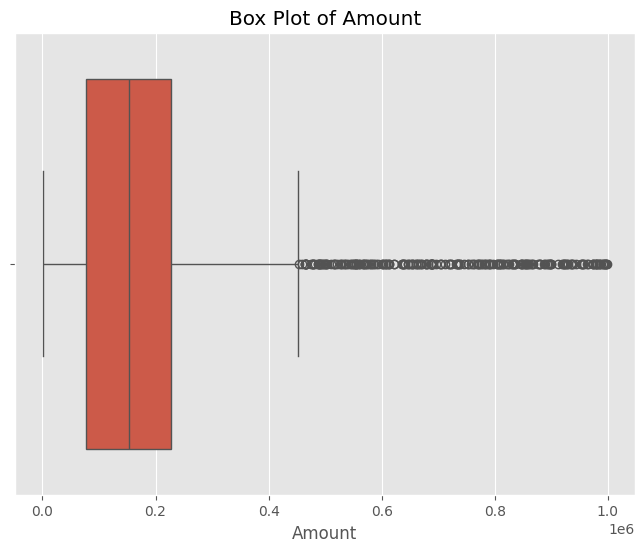

In [193]:
visualize_outliers_boxplot(df,'Amount')

In [199]:
#Remove outliers using Interquartile Range
import pandas as pd

def remove_outliers_iqr(df, column_name):

  if column_name in df.columns:
    if pd.api.types.is_numeric_dtype(df[column_name]):
      Q1 = df[column_name].quantile(0.25)
      Q3 = df[column_name].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Filter the DataFrame to keep only rows within the IQR range
      df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
      return df_filtered
    else:
      print(f"Column '{column_name}' is not numeric. Cannot remove outliers.")
      return df  # Return original DataFrame if error
  else:
    print(f"Column '{column_name}' not found in DataFrame.")
    return df  # Return original DataFrame if error




In [201]:
df_cleaned = remove_outliers_iqr(df.copy(), 'Amount') 

In [207]:
#Ordering Data 
df.sort_values(by=['Amount'], inplace=False, ascending=True)

,index,City,Date,Card Type,Exp Type,Gender,Amount,4,5
13442,13444,"Delhi, India",2014-05-02,Platinum,grocery,F,1005,NaN,NaN
18806,18808,"Murshidabad, India",2014-06-12,Silver,food,M,1018,NaN,NaN
3338,3340,"Ahmedabad, India",2015-01-19,Signature,grocery,F,1024,NaN,NaN
24956,24958,"Lucknow, India",2014-03-16,Signature,bills,F,1026,NaN,NaN
6145,6147,"Ahmedabad, India",2015-02-23,Silver,food,F,1028,NaN,NaN
...,...,...,...,...,...,...,...,...,...
328,330,"Delhi, India",2014-06-07,Signature,bills,F,994537,NaN,NaN
181,183,"Ahmedabad, India",2014-08-27,Platinum,bills,F,995634,NaN,NaN
252,254,"Ahmedabad, India",2015-04-17,Gold,bills,F,996291,NaN,NaN
132,134,"Delhi, India",2013-10-27,Gold,bills,F,996754,NaN,NaN


In [248]:
#Exploratory Data Analysis
#Summary statistics (mean), rounded to 2 decimal places
def calculate_mean_per_card_type(df, card_type_column, value_column):
    if card_type_column in df and value_column in df and df[card_type_column].dtype == 'object' and pd.api.types.is_numeric_dtype(df[value_column]):
        card_types = df[card_type_column].unique()  # Get all unique card types
        mean_values = {}
        for card_type in card_types:
            mean_values[card_type] = round(df[value_column].where(df[card_type_column] == card_type).mean(),2)
        return mean_values
    else:
        print("Invalid column names or data types.")
        return None

In [249]:
mean_amounts = calculate_mean_per_card_type(df, 'Card Type', 'Amount')
print(mean_amounts)

{'Gold': np.float64(154631.62), 'Platinum': np.float64(157493.83), 'Silver': np.float64(156371.03), 'Signature': np.float64(157133.72)}


In [245]:
#Summary statistics (median), rounded to 2 decimal places
def calculate_median_per_card_type(df, card_type_column, value_column):
    if card_type_column in df and value_column in df and df[card_type_column].dtype == 'object' and pd.api.types.is_numeric_dtype(df[value_column]):
        card_types = df[card_type_column].unique()
        median_values = {}
        for card_type in card_types:
            median_values[card_type] = round(df[value_column].where(df[card_type_column] == card_type).median(),2)
        return median_values
    else:
        print("Invalid column names or data types.")
        return None

In [246]:
median_amounts = calculate_median_per_card_type(df, 'Card Type', 'Amount')
print(median_amounts)

{'Gold': np.float64(150431.0), 'Platinum': np.float64(154256.0), 'Silver': np.float64(154024.0), 'Signature': np.float64(153972.0)}


In [250]:
#Summary statistics (standard deviation), rounded to 2 decimal places
def calculate_stddev_per_card_type(df, card_type_column, value_column):
    """Calculates standard deviation of value column per card type using .where()."""
    if card_type_column in df and value_column in df and df[card_type_column].dtype == 'object' and pd.api.types.is_numeric_dtype(df[value_column]):
        card_types = df[card_type_column].unique()
        std_values = {}
        for card_type in card_types:
            std_values[card_type] = round(df[value_column].where(df[card_type_column] == card_type).std(),2)
        return std_values
    else:
        print("Invalid column names or data types.")
        return None

In [251]:
#Summary statistics (median)
stddev_amounts = calculate_stddev_per_card_type(df, 'Card Type', 'Amount')
print(stddev_amounts)

{'Gold': np.float64(105800.48), 'Platinum': np.float64(102059.66), 'Silver': np.float64(100133.65), 'Signature': np.float64(104385.79)}


In [396]:
#Visualizations Overall Spending Patterns
#Histogram showing the distribution of spending amounts
def visualize_spending_amount_distribution(df, amount_column, x_limits=None):

    if amount_column in df and pd.api.types.is_numeric_dtype(df[amount_column]):
        plt.figure(figsize=(10, 6))
        ax = sns.histplot(df[amount_column], kde=True)  # kde adds a kernel density estimate
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=50)
        plt.title('Distribution of Spending Amounts')
        plt.xlabel('Spending Amount')
        plt.ylabel('Frequency')
        if x_limits:
            plt.xlim(x_limits[0], x_limits[1]) #set the limit here.
        plt.show()
    else:
        print(f"Column '{amount_column}' not found or is not numeric.")


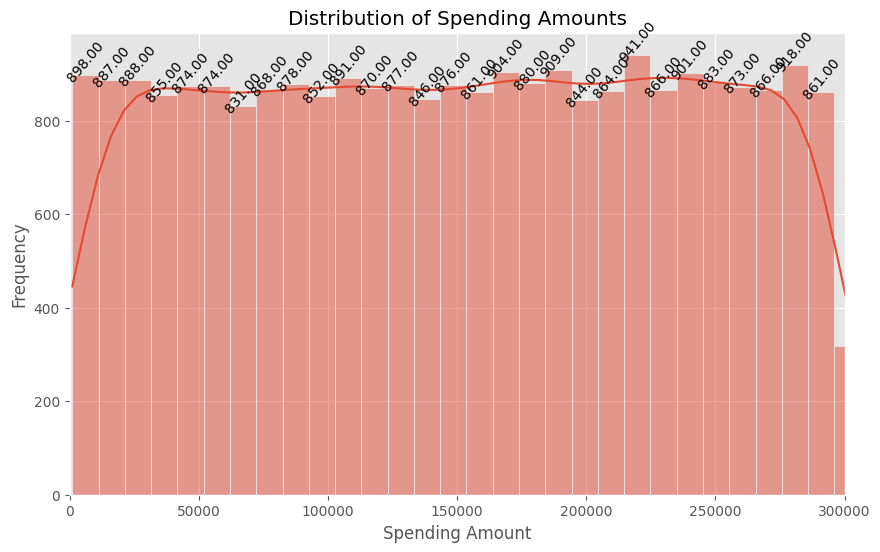

In [398]:
visualize_spending_amount_distribution(df, 'Amount', x_limits=(0,300000))

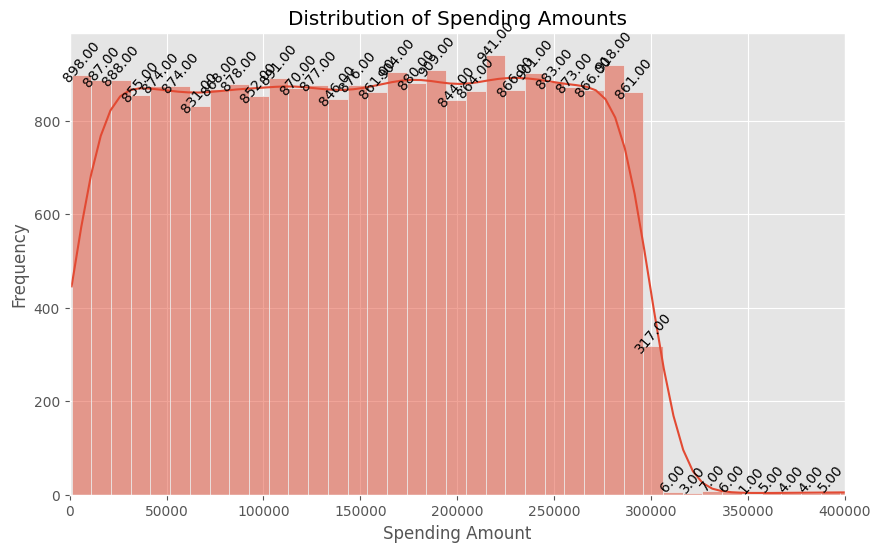

In [400]:
visualize_spending_amount_distribution(df, 'Amount', x_limits=(0,400000))

In [384]:
#Visualizations Overall Spending Patterns cont'd
#Time series plot showing spending changes over time. 
def visualize_spending_over_time(df, date_column, amount_column):
    if date_column in df and amount_column in df:
        if pd.api.types.is_datetime64_any_dtype(df[date_column]) and pd.api.types.is_numeric_dtype(df[amount_column]):
            plt.figure(figsize=(12, 6))
            sns.lineplot(x=date_column, y=amount_column, data=df)
            plt.title('Spending Changes Over Time')
            plt.xlabel('Date')
            plt.ylabel('Spending Amount')
            plt.show()

        else:
          print("Date column must be datetime and amount column must be numeric.")
    else:
        print(f"Columns '{date_column}' or '{amount_column}' not found in DataFrame.")



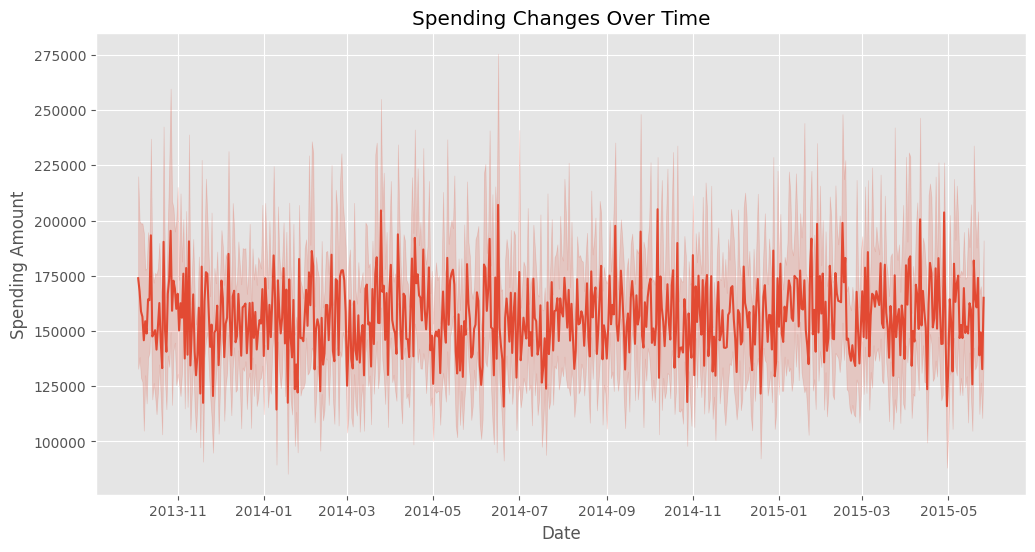

In [387]:
visualize_spending_over_time(df, 'Date', 'Amount')

In [371]:
#Visualizations Categorical Comparisions cont'd
#Bar Chart comparing spending based on card type
def visualize_mean_spend_per_card_type(mean_amounts): #figure called from mean above
    if isinstance(mean_amounts, dict):  
        card_types = list(mean_amounts.keys())
        mean_spends = list(mean_amounts.values())

        # Create a DataFrame from the dictionary
        avg_spend_df = pd.DataFrame({'Card Type': card_types, 'Average Spend': mean_spends})
        
        bar_colors = ['skyblue', 'salmon', 'lightgreen', 'orange']
        ax = sns.barplot(x='Card Type', y='Average Spend', data=avg_spend_df, hue='Card Type', palette=bar_colors, legend=False)

        plt.title('Mean Spend per Card Type')
        
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

        plt.show()
    else:
        print("Input must be a dictionary with card types and mean spends.")




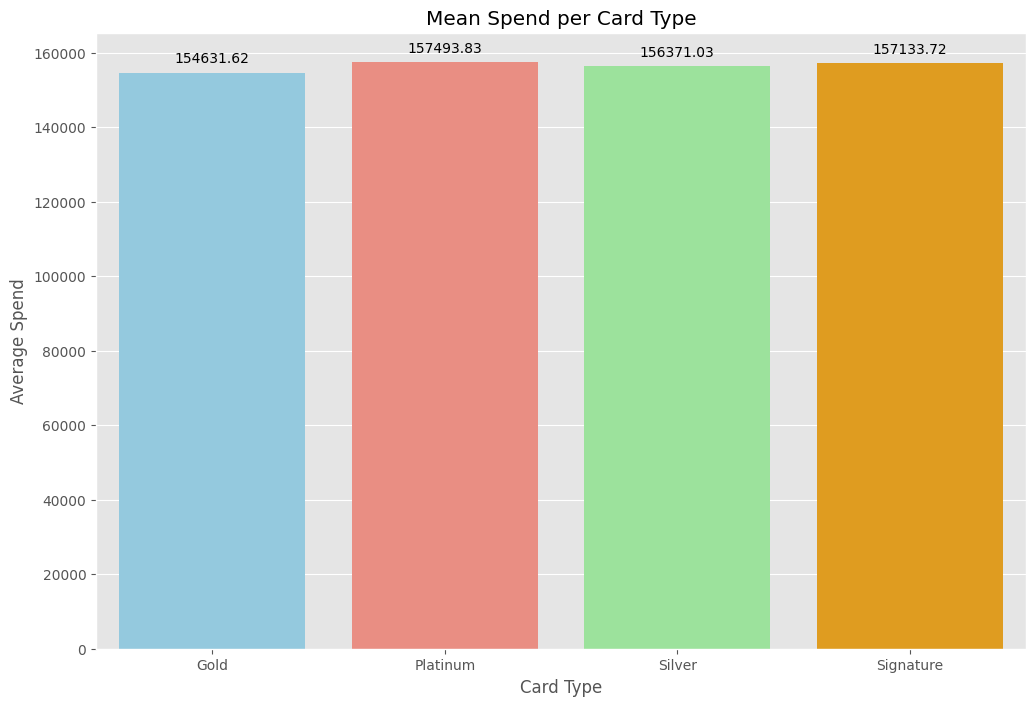

In [283]:
visualize_mean_spend_per_card_type(mean_amounts)

In [363]:
#Visualizations Categorical Comparisions cont'd
#Bar Chart comparing spending across different expense categories 
def visualize_mean_spending_by_expense_category(df, expense_column, amount_column,x_limits=None):

    if expense_column in df and amount_column in df:
        if df[expense_column].dtype == 'object' and pd.api.types.is_numeric_dtype(df[amount_column]):
            expense_spending = df.groupby(expense_column)[amount_column].mean().reset_index()

            plt.figure(figsize=(10, 6))
            bar_colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'pink', 'purple']
            ax = sns.barplot(x=amount_column, y=expense_column, data=expense_spending, orient='h', hue='Exp Type', palette=bar_colors, legend=False)
            plt.title('Mean Spending by Expense Category')
            plt.xlabel('Mean Spending Amount')
            plt.ylabel('Expense Category')
        if x_limits:
            plt.xlim(x_limits[0], x_limits[1]) #set the limit here.
        
            plt.show()
        else:
          print("Expense column must be object and amount column must be numeric.")
    else:
        print(f"Columns '{expense_column}' or '{amount_column}' not found in DataFrame.")



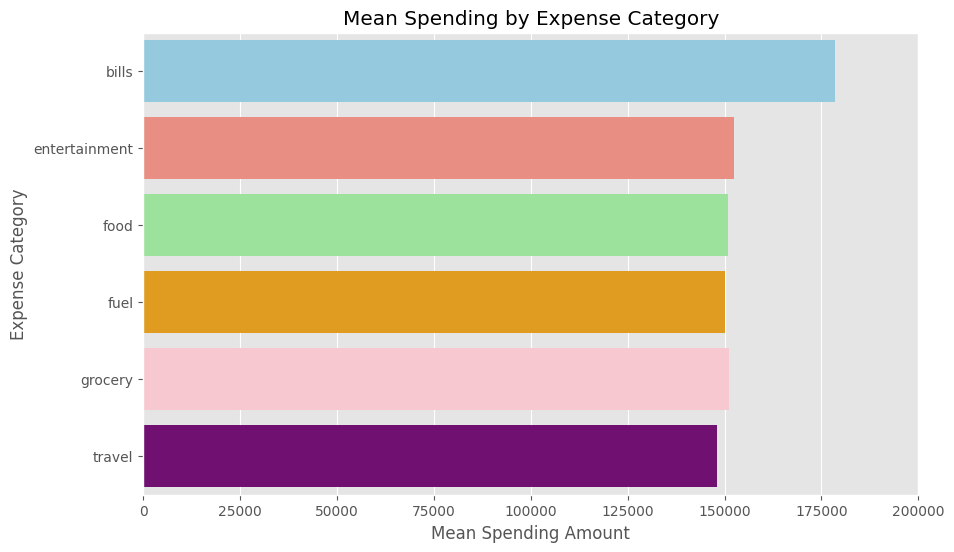

In [365]:
visualize_mean_spending_by_expense_category(df, 'Exp Type', 'Amount',x_limits=(0,200000))

None
